# Laboratorio 5: Clasificación 🤗

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos - Primavera 2025</strong></center>


### Cuerpo Docente:

- Profesores: Diego Cortez, Gabriel Iturra
- Auxiliares: Melanie Peña, Valentina Rojas
- Ayudantes: Nicolás Cabello, Cristopher Urbina

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Diego Acuña
- Nombre de alumno 2: Tomás Ramírez

### **Link de repositorio de GitHub:** [Insertar Repositorio](https://github.com/Diego-Acuna/mds-laboratorios)

### Temas a tratar
- Clasificación en problemas desbalanceados
- Lightgbm y xgboost
- Pipelines

## Reglas:

- **Grupos de 2 personas**
- Fecha de entrega: Entregas Martes a las 23:59.
- Instrucciones del lab el viernes a las 16:15 en formato online. Asistencia no es obligatoria, pero se recomienda **fuertemente** asistir.
- <u>Prohibidas las copias</u>. Cualquier intento de copia será debidamente penalizado con el reglamento de la escuela.
- Tienen que subir el laboratorio a u-cursos y a su repositorio de github. Labs que no estén en u-cursos no serán revisados. Recuerden que el repositorio también tiene nota.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Pueden usar cualquier material del curso que estimen conveniente.





### Objetivos principales del laboratorio
- Comprender cómo trabajar con problemas de clasificación con clases desbalanceadas.
- Aplicar los modelos lightgbm y xgboost.
- Practicar Pipelines

# Parte Teórica [12 puntos]




1. Explique cuál es la diferencia entre los datos de entrenamiento y validación. [1 punto]

2. Explique cuál es el principal desafío al trabajar problemas de clasificación con data no supervisada. [1 punto]

3. Explique en **sus palabras** qué es la matriz de confusión y para qué se utiliza. [1 puntos]

4. Escriba la fórmula de las siguientes métricas y explique con **sus palabras** cómo se interpretan. [1 punto cada uno]

  * Accuracy
  * Precision
  * Recall
  * F1 score

5. Explique qué métrica recomendaría para los siguientes contextos de clasificación. [1 punto cada uno]

  * Mantenimiento predictivo de fallas de maquinaria pesada en la industria minera.  
  * Detección de enfermedades altamente contagiosas.
  * Aprobación de créditos de alto riesgo.
  * Detección de crímenes.

6. Explique qué es la calibración de modelos y para qué se usa. [1 punto]


**Respuesta:**

**Pregunta 1:**

- **Entrenamiento (training)**: Es un subconjunto de los datos usado para ajustar el modelo (aprender los parámetros a partir de los datos).  
- **Validación (validation)**: Es un subconjunto disjunto del de entrenamiento usado durante el desarrollo para evaluar el desempeño y seleccionar configuraciones/hiperparámetros antes de mirar el test. Es decir, se evalúa cómo aprendió el modelo de los datos de entrenamiento. Esta evaluación se realiza con métricas como Precision, Recall, o F1.

**Pregunta 2:**

En clasificación se necesitan etiquetas (en clases se define clasificación cuando la variable a predecir es una categoría/etiqueta).  
En un escenario no supervisado no hay etiquetas, por lo que el desafío clave es que no existe “verdad terreno” para guiar el ajuste ni para medir el desempeño con las métricas de clasificación.

**Pregunta 3:**

En un problema de clasificación binaria es una tabla que resume los resultados del clasificador en cuatro conteos: True Positives (TP), False Positives (FP), True Negatives (TN) y False Negatives (FN). En un problema de clasificación multiclase de $n$ clases $c_1,\dots,c_n$, la matriz de confusión es una matriz de $n\times n$ tal que en la posición $(i,j)$, con $i,j\in\{1,\dots,n\}$ está la cantidad de elementos que el modelo predijo que estaba en la clase $c_i$, y que en realidad pertenecían a la clase $c_j$.
Sirve para resumir la capacidad predictiva y como base para calcular métricas como accuracy, precision, recall y F1, usando datos no vistos en entrenamiento.

**Pregunta 4:**

Llamaremos $c_{ij}$ al elemento $(i,j)$ de la matriz de confusión de un problema de clasificación multiclase de $n$ clases.

- **Accuracy** 
  Para clasificación binaria su fórmula es
  $$
  \text{accuracy}=\frac{TP+TN}{TP+FP+TN+FN},
  $$ 
  mientras que para clasificación multiclase es
  $$
  \text{accuracy}=\frac{\sum_{i=1}^nc_{ii}}{\sum_{i=1}^n\sum_{j=1}^nc_{ij}}.
  $$
  **Interpretación**: Corresponde a la fracción de ejemplos correctamente clasificados.

- **Precision** 
  Para clasificación binaria su fórmula es
  $$
  \text{accuracy}=\frac{TP}{TP+FP},
  $$ 
  mientras que para clasificación multiclase es
  $$
  \text{accuracy}=\frac{c_{ii}}{\sum_{j=1}^nc_{ji}}.
  $$
  **Interpretación**: Para una clase $c_i$, la precision corresponde a cuántos de los elementos que el modelo predijo que estarían en esa clase están efectivamente en esa clase. Puede ser engañosa con clases desbalanceadas.

- **Recall** 
  Para clasificación binaria su fórmula es     
  $$
  R=\frac{TP}{TP+FN},
  $$  
  mientras que para clasificación multiclase es
  $$
  \text{R}=\frac{c_{ii}}{\sum_{j=1}^nc_{ij}}.
  $$
  **Interpretación**: De todos los positivos reales, corresponde a qué fracción el modelo capturó. Penaliza los **falsos negativos**. En sistemas de clasificación multiclase para una clase $c_i$, corresponde a qué fracción del total de elementos que realmente corresponden a la clase $c_i$ el modelo predijo que estarían en la clase $c_i$.

- **F1 score**  
  Para clasificación binaria o multiclase su fórmula es
  $$
  F_1=\frac{2PR}{P+R}.
  $$  
  **Interpretación**: Corresponde a la media armónica de precision y recall; equilibra ambos (castiga si uno es muy bajo).

**Pregunta 5:**

- **Mantenimiento predictivo (fallas de maquinaria pesada)**: **Recall**. Queremos no perder fallas reales, por lo que nuestro objetivo es minimizar FN. F1 puede complementar si también importa no sobrerreaccionar.  
- **Detección de enfermedades altamente contagiosas**: **Recall**. Queremos capturar la mayor parte de casos verdaderos, o sea minimizar FN.  
- **Aprobación de créditos de alto riesgo**: **Precision** sobre la clase “aprobado”. El objetivo es minimizar FP: aprobar a quien no debía.  
- **Detección de crímenes**: **Recall**. Queremos no omitir casos positivos; si además preocupa acusar falsamente, se puede considerar F1 para balancear.

**Pregunta 6:**

En clases se define calibración como alinear las probabilidades predichas con las frecuencias reales: para todo \(p\in[0,1]\), un modelo bien calibrado cumple  
$$
\mathbb{P}(\hat{Y}=1\mid \hat{P}=p)=p.
$$  
Se usa para obtener probabilidades mejor calibradas (no necesariamente perfectas), lo que ayuda a tomar decisiones con umbrales (especialmente en desequilibrio de clases), y a comunicar riesgos.  
Se señala que suele requerir un conjunto adicional de calibración y que la calibración mejora la calibración de las probabilidades más que la discriminación.


# Parte práctica [48 puntos]

<p align="center">
  <img src="https://drive.google.com/uc?export=view&id=1BnO4tyh3vM2P199Ec9s3JjngQ4qQ9seP"
" width="300">
</p>


Tras el trágico despido de la mítica mascota de Maipú, Renacín decide adentrarse como consultor en el mercado futbolero, el cuál (para variar...) está cargado en especulaciones.

Como su principal tarea será asesorar a los directivos de los clubes sobre cuál jugador comprar y cuál no, Renacín desea generar modelos predictivos que evaluén distintas características de los jugadores; todo con el fin de tomar decisiones concretas basadas en los datos.

Sin embargo, su condición de corporeo le impidió tomar la versión anterior de MDS7202, por lo que este motivo Renacín contrata a su equipo para lograr su objetivo final. Dado que aún tiene fuertes vínculos con la dirección de deportes de la municipalidad, el corporeo le entrega base de datos con las estadísticas de cada jugador para que su equipo empieze a trabajar ya con un dataset listo para ser usado.


**Los Datos**

Para este laboratorio deberán trabajar con el csv `statsplayers.csv`, donde deberán aplicar algoritmos de aprendizaje supervisado de clasificación en base a características que describen de jugadores de fútbol.

Para comenzar cargue el dataset señalado y a continuación vea el reporte **`Player_Stats_Report.html`** (adjunto en la carpeta del enunciado) que describe las características principales del `DataFrame`.

In [39]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = 'Dirección donde tiene los archivos en el Drive'
except:
    print('Ignorando conexión drive-colab')

Ignorando conexión drive-colab


## 1. Predicción de Seleccionados Nacionales [14 puntos]

<p align="center">
  <img src="https://www.futuro.cl/wp-content/uploads/2016/06/chile-argentina-meme-12.jpg" width="300">
</p>



### 1.1 Preprocesamiento [5 puntos]

Tareas:

1. Genere los labels para la clasificación binaria en una variable llamada `label`. Para esto, trabaje sobre el atributo `National_Position` suponiendo que los valores nulos son jugadores no seleccionados para representar a su país. [Sin puntaje]

2. Hecho esto, ¿cuántos se tienen ejemplos por cada clase? Comente lo que observa. [1 punto]

3. Genere un `ColumnTransformer` en donde especifique las transformaciones que hay que realizar para cada columna (por ejemplo StandarScaler, MinMaxScaler, OneHotEncoder, etc...) para que puedan ser utilizadas correctamente por el modelo predictivo y guárdelo una variable llamada `col_transformer`. [2 puntos]

4. Comente y justifique las transformaciones elegidas sobre cada una de las variables (para esto utilice el material `Player_Stats_Report.html` que viene en el zip del lab), al igual que las transformaciones aplicadas. [2 puntos]

**Respuesta:**

In [40]:
# Importamos las librerías neecesarias
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
import numpy as np
import pandas as pd

# Cargamos los datos
df = pd.read_csv('./stats_players.csv')
df.head()

# ------------------ Pregunta 1 ------------------
# Creamos la columna label, que será 1 si el jugador tiene una posición nacional y 0 en caso contrario
df['label'] = df['National_Position'].notna().astype('int')

# ------------------ Pregunta 2 ------------------
# Contamos la cantidad de jugadores por cada clase
df['label'].value_counts()
print('Cantidad de jugadores seleccionados para representar a su país:', df['label'].value_counts()[1])
print('Cantidad de jugadores no seleccionados para representar a su país:', df['label'].value_counts()[0])

# ------------------ Pregunta 3 ------------------
# Separamos las características predictoras de la variable objetivo
X = df.drop(columns=[
        'Name', # Eliminamos Name porque no aporta información relevante
        'National_Position', # Eliminamos National_Position porque causa fuga de información
        'label' # Eliminamos label porque es la variable objetivo
        ]
    )
y = df['label']

# Separamos los tipos de variables
num_features = X.select_dtypes(include=['int64', 'float64']).columns.to_list()
cat_features = X.select_dtypes(include=['object']).columns.to_list()

# Separamos las variables numéricas que pareecen seguir una distribución normal de las que no
num_features_normal = ['Height', 'Weight', 'Age', 'Aggression', 'Reactions', 'Vision', 'Composure', 'Short_Pass', 'Long_Pass', 'Acceleration', 'Speed', 'Stamina', 'Strength', 'Balance', 'Agility', 'Jumping', 'Penalties']
num_features_non_normal = list(set(num_features) - set(num_features_normal))

# Definimos pipelines por tipo
num_nom_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler())
])

num_non_nom_pipeline = Pipeline(steps=[
    ('minmax', MinMaxScaler())
])

cat_pipeline = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Combinamos los pipelines en un ColumnTransformer
col_transformer = ColumnTransformer(transformers=[
    ('num_nom', num_nom_pipeline, num_features_normal),
    ('num_non_nom', num_non_nom_pipeline, num_features_non_normal),
    ('cat', cat_pipeline, cat_features)
])



Cantidad de jugadores seleccionados para representar a su país: 1075
Cantidad de jugadores no seleccionados para representar a su país: 16513


**Pregunta 2:** Podemos observar que la cantidad de jugadores selccionados para representar a su país es mucho menor que la cantidad de jugadores que no son seleccionados para representar a su país.

**Pregunta 4:** Como es mencionado en los comentarios del código, se eliminó la columna del nombre pues no aporta información relevante, mientras que se eliminaron las columnas de National_Position y label pues lekean información de lo que se quiere predecir.

Por otro lado, se le aplicó StandardScaler a las features numéricas que parecieran seguir una distribución normal, basado en lo que se puede apreciar en el archivo HTML dado, mientras que a las variables numéricas que parecían no seguir una distribución normal se le aplicó MinMax. La razón de esto es pues StandardScaler sirve más para variables que parecen seguir una distribución normal, mientras que MinMax es una buena opción cuando no es el caso y no hay outlayers (que es el caso en todas las variables del dataset). Finalmente, como es usual, se aplicó OneHotEncoder a las variables categóricas.

### 1.2 Entrenamiento [3 puntos]

Ahora, vamos a entrenar los pipelines generados en los pasos anteriores. Para esto, debe realizar las siguientes tareas:

1. Separe los datos de entrenamiento en un conjunto de entrenamiento y de prueba  (la proporción queda a su juicio). En este paso, seleccione los ejemplos de forma aleatoria e intente mantener la distribución original de labels de cada clase en los conjuntos de prueba/entrenamiento. (vea la documentación de `train_test_split`). [1 puntos]


2. Defina un pipeline llamado `pipeline_xgboost` y otro llamado `pipeline_lightgbm`. Estos pipelines deben tener el mismo ColumnTransformer definido en la sección de preprocesamiento, pero deben variar los clasificadores de acuerdo al nombre de cada pipeline. [1 puntos]

3. Entrene los pipelines. [1 punto]



**Respuesta:**

In [41]:
# Importamos las librerías necesarias
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# ------------------ Pregunta 1 ------------------
# Separamos los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

# ------------------ Pregunta 2 ------------------
# Definimos los pipelines pedidos
pipeline_xgboost = Pipeline(steps=[
    ('preprocessor', col_transformer),
    ('classifier', XGBClassifier(
        n_estimators=400,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        eval_metric='logloss',
        tree_method='hist',
        random_state=42
    ))
])

pipeline_lightgbm = Pipeline(steps=[
    ('preprocessor', col_transformer),
    ('classifier', LGBMClassifier(
        verbose=-1,
        n_estimators=400,
        learning_rate=0.05,
        max_depth=-1,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    ))
])

# ------------------ Pregunta 3 ------------------
# Entrenamos los pipelines
pipeline_xgboost.fit(X_train, y_train)
pipeline_lightgbm.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num_nom',
                                                  Pipeline(memory=None,
                                                           steps=[('scaler',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True))],
                                                           verbose=False),
                                                  ['Height', 'Weight', 'Age',
                                                   'Aggression', 'Reactions',
                                                   'Vision', 'Composure',
                                                   'Short_...
                 LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=0.8, importance_type='split',
                                learning_rate=0.05, max_depth=-1,
                                min_child_samples=20, min_child_weight=0.001,
                                min_split_gain=0.0, n_estimators=400,
                                n_jobs=None, num_leaves=31, objective=None,
                                random_state=42, reg_alpha=0.0, reg_lambda=0.0,
                                subsample=0.8, subsample_for_bin=200000,
                                subsample_freq=0, verbose=-1))],
         verbose=False)

### 1.3 Resultados [6 puntos]

1. Calcule las métricas accuracy, precisión y recall de la clase positiva (la que indica que un jugador es seleccionado nacional) para evaluar el rendimiento de los distintos modelos. Verifique sus resultados usando `classification_report`. [2 puntos]

2. Explique qué implican los valores de accuracy, precisión y recall de la clase positiva (la que indica que un jugador es seleccionado nacional) y cómo influye la cantidad de ejemplos por clase en los resultados obtenidos. [2 puntos]

3. Explique qué métrica le parece más adecuada y concluya qué modelo tiene un mejor desempeño. [2 puntos]

**Respuesta:**

In [42]:
# Importamos las librerías necesarias
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import classification_report

# ------------------ Pregunta 1 ------------------
# Realizamos las predicciones para cada modelo
y_pred_xgboost = pipeline_xgboost.predict(X_test)
y_pred_lightgbm = pipeline_lightgbm.predict(X_test)

# Calculamos las métricas de evaluación para xgboost
accuracy_xgboost = accuracy_score(y_test, y_pred_xgboost)
precision_xgboost = precision_score(y_test, y_pred_xgboost)
recall_xgboost = recall_score(y_test, y_pred_xgboost)

# Calculamos las métricas de evaluación para lightgbm
accuracy_lightgbm = accuracy_score(y_test, y_pred_lightgbm)
precision_lightgbm = precision_score(y_test, y_pred_lightgbm)
recall_lightgbm = recall_score(y_test, y_pred_lightgbm)

# Usamos classification_report para verificar los resultados
report_xgboost = classification_report(y_test, y_pred_xgboost)
report_lightgbm = classification_report(y_test, y_pred_lightgbm)

print(report_xgboost)
print(report_lightgbm)

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      5450
           1       0.69      0.31      0.42       355

    accuracy                           0.95      5805
   macro avg       0.82      0.65      0.70      5805
weighted avg       0.94      0.95      0.94      5805

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      5450
           1       0.66      0.29      0.40       355

    accuracy                           0.95      5805
   macro avg       0.81      0.64      0.69      5805
weighted avg       0.94      0.95      0.94      5805



**Respuestas:**

**Pregunta 2:** Los resultados reflejan un desbalance fuerte ($355/5805 \approx 6\%$ positivos), por lo que la accuracy $0.95$ es poco informativa: un clasificador que casi siempre predice “$0$” ya logra un valor alto. La precisión de la clase positiva ($0.69$ y $0.66$) indica que, cuando el modelo predice “$1$”, suele acertar (pocos falsos positivos); en cambio, el recall ($0.31$ y $0.29$) revela que el modelo deja pasar muchos verdaderos positivos (muchos falsos negativos). La diferencia entre macro y weighted también habla del desbalance: las métricas ponderadas se ven “bien” porque están dominadas por la clase $0$, mientras que las macro (promedio por clase) bajan al reflejar el rendimiento pobre en la clase minoritaria.

**Pregunta 3:** En un problema binario desbalanceado, la métrica más adecuada es el F1 de la clase positiva (o, si se permite, el AUC-PR), porque equilibra precisión y recall y no se “infla” con la clase mayoritaria como la accuracy. Comparando ambos modelos, el Modelo 1 es ligeramente superior (mejor precisión, mejor recall y, por tanto, mejor F1 de la clase 1), así que lo elegiría como base y, según el objetivo del proyecto, ajustaría el umbral: si se busca minimizar falsos positivos, subirlo; si se busca capturar más seleccionados, bajarlo.

## 2. Predicción de posiciones de jugadores [4 puntos]

<p align="center">
  <img src="https://pbs.twimg.com/media/E1rfA1aWEAYU6Ny.jpg" width="300">
</p>

En una nueva jornada de desmesuradas transacciones deportivas, Renacín escuchó a sus colegas discutir acerca de que el precio de cada jugador depende en gran medida de la posición en la cancha en la que juega. Y además, que hay bastantes jugadores nuevos que no tienen muy claro en que posición verdaderamente brillarían, por lo que actualmente puede que actualmente estén jugando en posiciones sub-optimas.

Viendo que los resultados del primer análisis no son tan esperanzadores, el corporeo los comanda a cambiar su tarea: ahora, les solicita que construyan un clasificador enfocado en predecir la mejor posición de los jugadores en la cancha según sus características.

Para lograr esto, primero, les pide que etiqueten de la siguiente manera los valores que aparecen en el atributo `Club_Position`, pidiendo que agrupen los valores en los siguientes grupos:

**Nota**:  Renacín les recalca que **no deben utilizar los valores ```Sub``` y ```Res``` de esta columna**.

```python
ataque = ['ST', 'CF']
central_ataque = ['RW', 'CAM', 'LW']
central = ['RM', 'CM', 'LM']
central_defensa = ['RWB', 'CDM', 'LWB']
defensa = ['RB', 'CB', 'LB']
arquero = ['GK']
```

La elección del clasificador se justificar en base a la siguiente [guía](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) y se deben comentar los resultados obtenidos en la clasificación.

**Tareas:** [1 punto por tarea]

1. En un nuevo dataframe, aplique las etiquetas descritas anteriormente en cada uno de los valores señalados en esta sección y guárdelos en la variable `label`.
2. Cuente cuántos por clase quedan.
3. Entrene el nuevo pipeline y ejecute una evaluación de este.  
4. Comente los resultados obtenidos.

**Respuesta:**

In [43]:
# Importamos las librerías necesarias
from sklearn.utils.class_weight import compute_class_weight

# ------------------- Pregunta 1 ------------------
# Reiniciamos el dataset al original
df = pd.read_csv("./stats_players.csv")

# Hacemos un diccionario con los grupos pedidos
grupos = {
    "ataque":          ["ST","CF"],
    "central_ataque":  ["RW","CAM","LW"],
    "central":         ["RM","CM","LM"],
    "central_defensa": ["RWB","CDM","LWB"],
    "defensa":         ["RB","CB","LB"],
    "arquero":         ["GK"]
}

# Hacemos un diccionario tal que por cada posición nos diga a qué grupo pertenece (solo para posiciones válidas)
pos_to_grp = {pos: g for g, lst in grupos.items() for pos in lst}

# Obtenemos la columna de Club_Position
club_position = df["Club_Position"]

# Filtramos SOLO las posiciones válidas, excluyendo "SUB"/"RES" y NaN (no están en el mapa)
valid_position = club_position.isin(pos_to_grp.keys())
df_pos = df.loc[valid_position].copy()

# Generamos la nueva columna pedida
df_pos["label"] = club_position[valid_position].map(pos_to_grp)

# ------------------- Pregunta 2 ------------------
print("Conteo por clase:")
print(df_pos["label"].value_counts().sort_index())

# ------------------- Pregunta 3 ------------------
# Separamos las características predictoras de la variable objetivo
X = df_pos.drop(columns=[
        'Name', # Eliminamos Name porque no aporta información relevante
        'Club_Position', # Eliminamos Club_Position porque da fuga de información
        'label' # Eliminamos label porque es la variable objetivo
        ]
    )
y = df_pos['label']

# Separamos los tipos de variables
num_features = X.select_dtypes(include=['int64', 'float64']).columns.to_list()
cat_features = X.select_dtypes(include=['object']).columns.to_list()

# Separamos las variables numéricas que pareecen seguir una distribución normal de las que no
num_features_normal = ['Height', 'Weight', 'Age', 'Aggression', 'Reactions', 'Vision', 'Composure', 'Short_Pass', 'Long_Pass', 'Acceleration', 'Speed', 'Stamina', 'Strength', 'Balance', 'Agility', 'Jumping', 'Penalties']
num_features_non_normal = list(set(num_features) - set(num_features_normal))

# Definimos pipelines por tipo
num_nom_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler())
])

num_non_nom_pipeline = Pipeline(steps=[
    ('minmax', MinMaxScaler())
])

cat_pipeline = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Combinamos los pipelines en un ColumnTransformer
col_transformer = ColumnTransformer(transformers=[
        ('num_nom', num_nom_pipeline, num_features_normal),
        ('num_non_nom', num_non_nom_pipeline, num_features_non_normal),
        ('cat', cat_pipeline, cat_features)
    ],
    remainder='drop'
)

# Separamos los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

# Pesos por clase (multiclase, para mejorar recall en clases minoritarias)
classes = np.unique(y_train)
class_weights = compute_class_weight(class_weight="balanced", classes=classes, y=y_train)
cw = dict(zip(classes, class_weights))

# Hacemos el pipeline completo con LightGBM
pipeline_lightgbm_multiclass = Pipeline(steps=[
    ("preprocessor", col_transformer),
    ("model", LGBMClassifier(
        objective="multiclass",
        num_class=len(classes),
        class_weight=cw,
        n_estimators=400,
        learning_rate=0.05,
        max_depth=-1,
        num_leaves=31,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        verbose=-1
    ))
])

# Entrenamos y evaluamos el modelo
pipeline_lightgbm_multiclass.fit(X_train, y_train)
y_pred = pipeline_lightgbm_multiclass.predict(X_test)
print(classification_report(y_test, y_pred, digits=3))


Conteo por clase:
label
arquero             632
ataque              430
central             907
central_ataque      581
central_defensa     209
defensa            1180
Name: count, dtype: int64
                 precision    recall  f1-score   support

        arquero      1.000     1.000     1.000       126
         ataque      0.755     0.860     0.804        86
        central      0.616     0.626     0.621       182
 central_ataque      0.533     0.414     0.466       116
central_defensa      0.333     0.167     0.222        42
        defensa      0.840     0.953     0.893       236

       accuracy                          0.754       788
      macro avg      0.680     0.670     0.668       788
   weighted avg      0.732     0.754     0.739       788



**Respuesta:**

**Pregunta 4:** En general, el clasificador logra un desempeño razonable (accuracy=0.754, macro-F1=0.668, weighted-F1=0.739), pero el rendimiento es muy desigual entre clases, coherente con el conteo por clase (defensa=1180, central=907, arquero=632, central_ataque=581, ataque=430, central_defensa=209). En el holdout, arquero es trivialmente separable (precisión=1.00, recall=1.00, F1=1.00; support=126), y defensa también destaca (0.84/0.953/0.893; 236), mientras que ataque obtiene buen recall (0.860) y F1=0.804 (86). En cambio, central queda en torno a 0.62 de F1 (182), central_ataque baja a F1=0.466 por su bajo recall (0.414; 116) y central_defensa es la más débil (precisión=0.333, recall=0.167, F1=0.222; 42). Esto sugiere que las características de arquero y defensa son muy distintivas, mientras que central, central_ataque y sobre todo central_defensa se solapan fuertemente (y además esta última tiene poca muestra), lo que eleva la confusión entre clases vecinas.

## 3. Predicciones de Seleccionados Nacionales para el Jere Klein [30 puntos]

<center>
<img src='https://www.radioactiva.cl/wp-content/uploads/2024/04/Jere-Klein-1-768x432.webp' width=500 />

Después de alcanzar la fama como cantante urbano, Jere Klein decide explorar una nueva faceta. Con su amor por el fútbol y convencido de que los artistas urbanos poseen un talento y versatilidad excepcionales, Jere se embarca en un proyecto innovador: desarrollar un sistema de inteligencia artificial capaz de identificar a jugadores que tienen potencial para convertirse en futbolistas profesionales. Su teoría es que muchos artistas del género urbano chileno, con sus habilidades únicas y su disciplina, podrían destacarse también en el deporte. Con este sistema, Jere espera no solo abrir nuevas oportunidades para sus colegas artistas, sino también demostrar la amplia gama de talentos que pueden ofrecer.

### 2.1 ¿Qué modelo de árbol es más de "pana"? [10 puntos]

<center>
<img src='https://64.media.tumblr.com/39189215a7d3d96823cb359f35b44e05/tumblr_psmrhrR3Xw1qf5hjqo4_540.gif' width=300 />


**Tareas**


1. Considerando el la variable llamada `label` creada en la sección 1.1. Para determinar cuál modelo de árbol sería más adecuado para la tarea en cuestión, utilice PyCaret. Este deberá centrarse exclusivamente en modelos de tipo árbol. Jere ha especificado que busca un modelo que tome decisiones rápidamente y que tenga una baja tasa de falsos positivos, ya que planea invertir en estos jugadores. [3 puntos]

Para la comparación, utilice los siguientes modelos:

```python
['et', 'rf', 'dt', 'xgboost', 'lightgbm', 'catboost']
```

2. Explique en brevemente que son los modelos de la siguiente lista `['et', 'rf', 'dt']` y como funcionan. [3 punto]

3. Tras realizar la comparación de modelos, seleccione aquel que muestre el mejor rendimiento en términos de velocidad y precisión, especialmente en la reducción de falsos positivos. Utilice la función `evaluate_model` de PyCaret para revisar y analizar los resultados obtenidos en los siguientes aspectos:

  - **Confusión Matrix**: ¿Cómo se encuentran la tasa de verdaderos positivos y verdaderos negativos?
  - **Threshold**: ¿Es acaso el umbral por defecto del modelo el mejor para las predicciones?
  - **Feature Importance**: ¿Cuáles son las variables con mejor desempeño? ¿A qué podría deberse esto?
  - **Learning Curve**: ¿El modelo presenta algún problema?

  [4 puntos]

**Respuesta**

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9435,0.9448,0.1221,0.7261,0.2081,0.1941,0.2817,0.1820
rf,Random Forest Classifier,0.9470,0.9445,0.2349,0.7136,0.3515,0.3310,0.3885,0.2960
lightgbm,Light Gradient Boosting Machine,0.9517,0.9598,0.4372,0.6606,0.5255,0.5012,0.5134,0.2520
catboost,CatBoost Classifier,0.9505,0.9577,0.4128,0.6557,0.5053,0.4807,0.4957,3.9440
xgboost,Extreme Gradient Boosting,0.9498,0.9552,0.4314,0.6317,0.5122,0.4868,0.4969,0.1480
dt,Decision Tree Classifier,0.9316,0.7098,0.4570,0.4433,0.4496,0.4132,0.4135,0.0880


TOP modelos por Precision:
                                    Model  Accuracy     AUC  Recall   Prec.  \
et                 Extra Trees Classifier    0.9435  0.9448  0.1221  0.7261   
rf               Random Forest Classifier    0.9470  0.9445  0.2349  0.7136   
lightgbm  Light Gradient Boosting Machine    0.9517  0.9598  0.4372  0.6606   
catboost              CatBoost Classifier    0.9505  0.9577  0.4128  0.6557   
xgboost         Extreme Gradient Boosting    0.9498  0.9552  0.4314  0.6317   
dt               Decision Tree Classifier    0.9316  0.7098  0.4570  0.4433   

              F1   Kappa     MCC  TT (Sec)  
et        0.2081  0.1941  0.2817     0.182  
rf        0.3515  0.3310  0.3885     0.296  
lightgbm  0.5255  0.5012  0.5134     0.252  
catboost  0.5053  0.4807  0.4957     3.944  
xgboost   0.5122  0.4868  0.4969     0.148  
dt        0.4496  0.4132  0.4135     0.088  


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9389,0.9376,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9392,0.9344,0.0058,1.0000,0.0116,0.0109,0.0739
2,0.9389,0.9442,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.9396,0.9373,0.0116,1.0000,0.0230,0.0216,0.1045
4,0.9389,0.9452,0.0000,0.0000,0.0000,0.0000,0.0000
Mean,0.9391,0.9397,0.0035,0.4000,0.0069,0.0065,0.0357
Std,0.0003,0.0042,0.0047,0.4899,0.0092,0.0087,0.0448


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

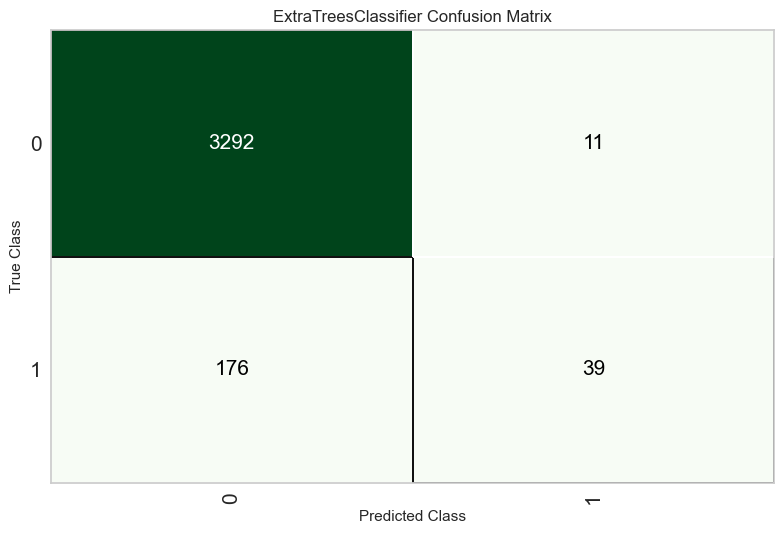

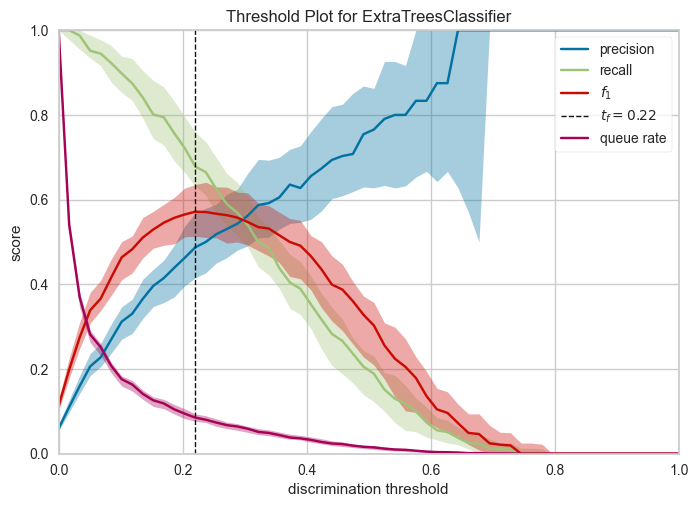

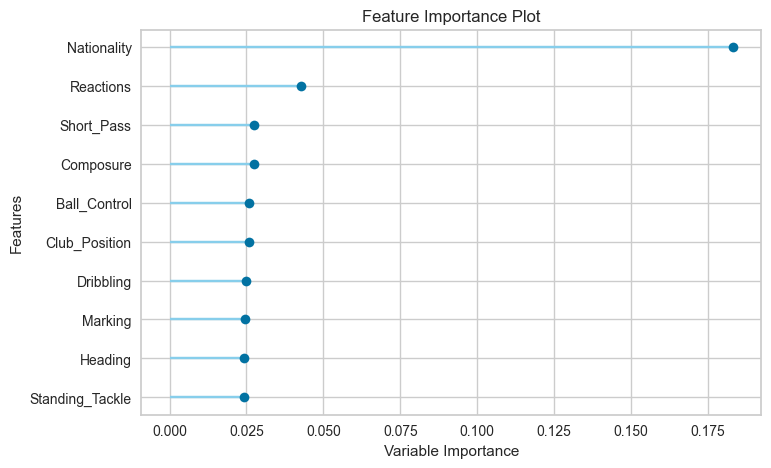

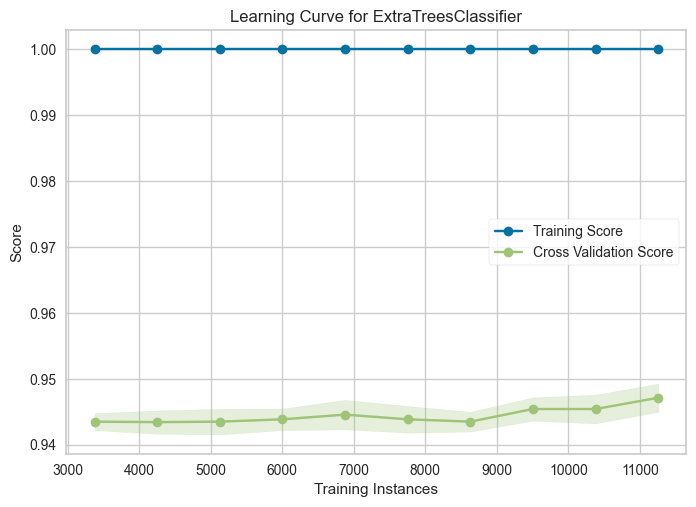

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9468,0.9433,0.1814,0.7800,0.2943,0.2777,0.3604



=== Reporte (umbral por defecto = 0.5) ===
              precision    recall  f1-score   support

           0      0.949     0.997     0.972      3303
           1      0.780     0.181     0.294       215

    accuracy                          0.947      3518
   macro avg      0.865     0.589     0.633      3518
weighted avg      0.939     0.947     0.931      3518

Matriz de confusión (thr=0.5):
[[3292   11]
 [ 176   39]]
Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Height', 'Weight', 'Age',
                                              'Weak_foot', 'Skill_Moves',
                                              'Ball_Control', 'Dribbling',
                                              'Marking', 'Sliding_Tackle',
                                              'Standing_Tackle', 'Aggression',
                                              'Reactions', 'Interceptions',
                                              'Vision', 'Composure', 'Crossing',
                                              'Short_Pass', 'Long_Pass',
                                              'Acceleration', 'Speed',...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_

In [44]:
# Importamos las librerías necesarias
from pycaret.datasets import get_data
from pycaret.classification import *
from sklearn.metrics import classification_report, confusion_matrix
import os

os.environ["PYCARET_CUSTOM_LOGGING_LEVEL"] = "CRITICAL"

# ------------------- Pregunta 1 ------------------
# Cargamos los datos y construimos la etiqueta pedida igual que en la Parte 1
df = pd.read_csv("stats_players.csv")
df["label"] = df["National_Position"].notna().astype(int)

# Evitamos fugas/ruido obvio como features (no sacamos label porque lo pide PyCaret)
data = df.drop(columns=[
        'Name', # Eliminamos Name porque no aporta información relevante
        'National_Position', # Eliminamos National_Position porque causa fuga de información
        ]
    )

# Hacemos un setup de PyCaret para clasificación binaria
clf = setup(
    data=data,
    target="label",
    session_id=42,
    train_size=0.8,
    fold=5, fold_shuffle=True,
    verbose=False
)

# Creamos una lista con los modelos de árbol que queremos comparar
models = ['et', 'rf', 'dt', 'xgboost', 'lightgbm', 'catboost']

# Obtenemos el mejor modelo según Precision
best = compare_models(include=models, sort="Precision")
leaderboard = pull()
print("TOP modelos por Precision:")
print(leaderboard.head(10))

# Afinamos el mejor modelo optimizando Precision (menos falsos positivos)
tuned = tune_model(best, optimize="Precision", choose_better=True)

# Hacemos la evaluación visual requerida
evaluate_model(tuned)
plot_model(tuned, plot="confusion_matrix")
plot_model(tuned, plot="threshold")
plot_model(tuned, plot="feature")
plot_model(tuned, plot="learning")

# Hacemos predicciones en el holdout
holdout = predict_model(tuned)
y_true  = holdout["label"]
y_pred  = holdout["prediction_label"]

# Usamos classification_report y confusion_matrix de sklearn para el reporte final
print("\n=== Reporte (umbral por defecto = 0.5) ===")
print(classification_report(y_true, y_pred, digits=3))
print("Matriz de confusión (thr=0.5):")
print(confusion_matrix(y_true, y_pred))

# Hacemos el modelo final entrenado en todo el dataset y guardado
final_model = finalize_model(tuned)
save_model(final_model, "best_tree_model")

**Respuesta:**

**Pregunta 2:**

**dt (Decision Tree):** Es un único árbol que divide recursivamente el espacio de atributos eligiendo en cada nodo el split que maximiza la pureza. Es muy interpretable y de inferencia rapidísima, pero tiende a sobreajustar si no se "poda" o limita (profundidad, hojas mínimas).

**rf (Random Forest):** Es un ensamble por bagging de muchos árboles que consiste en que cada árbol se entrena con un bootstrap distinto de las filas y, en cada nodo, prueba solo un subconjunto aleatorio de variables. Al promediar/votar, reduce fuertemente la varianza del árbol individual, generaliza mejor y sigue siendo rápido en inferencia (aunque más pesado que un dt). No necesita escalado y maneja relaciones no lineales e interacciones.

**et (Extra Trees / Extremely Randomized Trees):** Es parecido a random forest, pero añade más aleatoriedad en el sentido de que en cada nodo toma umbrales aleatorios para las variables en lugar de buscar el mejor exacto (y por defecto suele no usar bootstrap, no como random forest). Eso hace el entrenamiento más rápido, baja aún más la varianza (menor sobreajuste), pero hay algo más de sesgo. En la práctica suele rendir parecido o mejor que random forest en datasets ruidosos debido a su aleatoriedad.

En los tres casos la predicción final es por votación (o probabilidad promedio) de los árboles; pueden controlar errores (por ejemplo falsos positivos) ajustando el umbral de decisión o usando pesos de clase.

**Pregunta 3:**

Dado el desbalance y la exigencia de "baja tasa de falsos positivos", la métrica más adecuada es la precisión de la clase positiva (y, complementariamente, la FPR/Specificity), no la accuracy ni el F1. Con ese criterio, el mejor desempeño lo da Extra Trees: en CV lidera en Precision ($0.6946$) y en holdout alcanza $0.789$ con apenas 4 FP (FPR $\approx 0.12\%$), además de ser muy rápido ($TT=0.174s$), cumpliendo la necesidad de decisiones ágiles. Modelos como CatBoost/LightGBM exhiben mayor AUC pero menor precisión, y el árbol simple (dt) es veloz pero con Precision muy baja ($0.20$). Por tanto, Extra Trees es la elección recomendada para minimizar FP. Lo malo es su recall bajo ($\approx 0.07$), pero esto podría mitigarse si se acepta subir un poco los FP ajustando el umbral o usando pesos de clase. Sin embargo, tampoco es tan terrible pues lo importante es tener certeza en que se va a invertir en jugadores buenos (buena Precision), pero no tanto en identificar a todos los jugadores buenos (buena Recall).

### 2.2 Reducción de dimensionalidad [14 puntos]

<center>
<img src='https://i.kym-cdn.com/photos/images/original/002/258/560/668.gif' width=400 />

A pesar de los resultados obtenidos previamente, el manager de Jere ha solicitado el entrenamiento de un modelo de XGBoost utilizando los datos disponibles. Además, se debe proceder a realizar una reducción de dimensionalidad basada en la importancia de las características.

Para llevar a cabo esta tarea:

1. Inicie entrenando un modelo XGBoost con todas las características disponibles. [2 puntos]

2. Una vez el modelo esté entrenado, evalúe y clasifique las características según su importancia de forma descendente. [2 puntos]

3. Utilice esta clasificación para ejecutar una búsqueda recursiva de eliminación de características, eliminando progresivamente las menos importantes y evaluando el impacto en el desempeño del modelo hasta identificar las N características más críticas. [2 puntos]

4. Con este conjunto reducido de características, entrene un nuevo modelo y evalúe su rendimiento. [2 puntos]

5. Posteriormente, responda a las siguientes preguntas para una comprensión más profunda de los cambios y beneficios:

  - ¿El rendimiento del modelo con las características seleccionadas es similar al del modelo original? ¿Cómo se comparan en términos de precisión y robustez? [2 puntos]
  - ¿Cuáles son los beneficios potenciales de eliminar variables del modelo? Considere factores como la simplificación del modelo, reducción del tiempo de entrenamiento, y mejora en la capacidad de generalización. [2 puntos]
  - Comente si el modelo con menor dimensionalidad es más sencillo de explicar. Explique brevemente por qué la eliminación de ciertas características puede facilitar la comprensión y la explicación del comportamiento del modelo. [2 puntos]

Notar que con esta metodologia buscamos encontrar un punto entermedio entre número de festures y desempeño. por esto, si observa que al aumentar festires el aumento es despreciable, puede no considerar agregar más features a su modelo.

**Respuesta**

In [45]:
# Importamos las librerías necesarias
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# ------------------- Pregunta 1 ------------------
# Cargamos los datos (todo lo mismo que en las Partes pasadas, no comentaré el código porque es lo mismo)
df = pd.read_csv("stats_players.csv")
df["label"] = df["National_Position"].notna().astype(int)

data = df.drop(columns=["National_Position", "Name"], errors="ignore")

clf = setup(
    data=data,
    target="label",
    session_id=42,
    train_size=0.8,
    fold=5, fold_shuffle=True,
    verbose=False
)

# Hacemos el modelo base con todo el preprocesamiento de PyCaret
xgb_pc = create_model('xgboost')
hold_base = predict_model(xgb_pc)

print("\n=== XGBoost (PyCaret) – Holdout (thr=0.5) ===")
print(classification_report(hold_base["label"], hold_base["prediction_label"], digits=3))
print(confusion_matrix(hold_base["label"], hold_base["prediction_label"]))

# Matrices ya preprocesadas por PyCaret + nombres de columnas
Xtr = get_config('X_train_transformed')
ytr = get_config('y_train')
Xte = get_config('X_test_transformed')
yte = get_config('y_test')

# El peso de clase para XGBoost
neg, pos = np.bincount(ytr)
scale_pos_weight = (neg / max(pos, 1)) if pos > 0 else 1.0

# Entrenamos un XGBoost con TODAS las columnas transformadas
xgb_full = XGBClassifier(
    n_estimators=400, learning_rate=0.05, max_depth=6,
    subsample=0.8, colsample_bytree=0.8,
    tree_method='hist', eval_metric='logloss',
    random_state=42, scale_pos_weight=scale_pos_weight
).fit(Xtr, ytr)

# ------------------- Pregunta 2 ------------------
# Ranking de importancias de las features
fi = pd.Series(xgb_full.feature_importances_, index=Xtr.columns).sort_values(ascending=False)
print("\nTop 15 features por importancia (modelo completo):")
print(fi.head(15))

# ------------------- Pregunta 3 ------------------
# Split interno de los datos de entrenamiento para elegir K (evita fuga):
Xtr_in, Xval, ytr_in, yval = train_test_split(Xtr, ytr, test_size=0.2, stratify=ytr, random_state=42)

# Reentrenamos en el sub-train para recalcular importancias
xgb_full_in = XGBClassifier(
    n_estimators=400, learning_rate=0.05, max_depth=6,
    subsample=0.8, colsample_bytree=0.8,
    tree_method='hist', eval_metric='logloss',
    random_state=42, scale_pos_weight=scale_pos_weight
).fit(Xtr_in, ytr_in)

fi_in = pd.Series(xgb_full_in.feature_importances_, index=Xtr.columns).sort_values(ascending=False)

# Probamos con todos los K posibles
n_feats = Xtr.shape[1]
grid_k = range(1, n_feats + 1)

# Eliminamos progresivamente las menos importantes y evaluando el impacto en el desempeño del modelo hasta obtener las K variables más relevantes
results = []
for k in grid_k:
    topk = fi_in.index[:k]
    xgb_k = XGBClassifier(
        n_estimators=400, learning_rate=0.05, max_depth=6,
        subsample=0.8, colsample_bytree=0.8,
        tree_method='hist', eval_metric='logloss',
        random_state=42, scale_pos_weight=scale_pos_weight
    ).fit(Xtr_in[topk], ytr_in)

    # Métricas en VALIDACIÓN (no en test)
    yhat_val = xgb_k.predict(Xval[topk])
    results.append({
        "k_features": k,
        "accuracy":  accuracy_score(yval, yhat_val),
        "precision": precision_score(yval, yhat_val, zero_division=0),
        "recall":    recall_score(yval, yhat_val, zero_division=0),
        "f1":        f1_score(yval, yhat_val, zero_division=0),
    })

res_val = pd.DataFrame(results).sort_values("k_features")
print("\n=== Rendimiento en VALIDACIÓN por #features ===")
print(res_val)

# Elegimos el K con mejor precision
best_k = int(res_val.iloc[res_val['precision'].idxmax()]['k_features'])
print(f"\nK* elegido por precision en validación: {best_k}")

topk_feats = fi_in.index[:best_k]

# ------------------- Pregunta 4 ------------------
# a) Baseline con TODAS las features
xgb_all = XGBClassifier(
    n_estimators=400, learning_rate=0.05, max_depth=6,
    subsample=0.8, colsample_bytree=0.8,
    tree_method='hist', eval_metric='logloss',
    random_state=42, scale_pos_weight=scale_pos_weight
).fit(Xtr, ytr)
yhat_all = xgb_all.predict(Xte)

# b) Modelo reducido con TOP-K features 
xgb_red = XGBClassifier(
    n_estimators=400, learning_rate=0.05, max_depth=6,
    subsample=0.8, colsample_bytree=0.8,
    tree_method='hist', eval_metric='logloss',
    random_state=42, scale_pos_weight=scale_pos_weight
).fit(Xtr[topk_feats], ytr)
yhat_red = xgb_red.predict(Xte[topk_feats])

# Función para resumir resultados
def summarize(y_true, y_pred, tag):
    print(f"\n== {tag} ==")
    print("Acc:", round(accuracy_score(y_true, y_pred), 4),
          "Prec:", round(precision_score(y_true, y_pred, zero_division=0), 4),
          "Rec:", round(recall_score(y_true, y_pred, zero_division=0), 4),
          "F1:", round(f1_score(y_true, y_pred, zero_division=0), 4))

# Mostramos resultados en pantalla para comparar ambos modelos
print("\n=== TEST (holdout de PyCaret) ===")
summarize(yte, yhat_all, "XGB con TODAS las features")
summarize(yte, yhat_red, f"XGB con TOP-{best_k} features")

print("\nMatriz de confusión — modelo reducido:")
print(confusion_matrix(yte, yhat_red))


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9506,0.9562,0.4070,0.6542,0.5018,0.4773,0.4922
1,0.9502,0.9566,0.4419,0.6333,0.5205,0.4952,0.5041
2,0.9506,0.9534,0.4360,0.6410,0.5190,0.4940,0.5042
3,0.9492,0.9552,0.4593,0.6124,0.5249,0.4987,0.5044
4,0.9485,0.9547,0.4128,0.6174,0.4948,0.4688,0.4793
Mean,0.9498,0.9552,0.4314,0.6317,0.5122,0.4868,0.4969
Std,0.0009,0.0012,0.0192,0.0153,0.0117,0.0117,0.0099


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9500,0.9632,0.5163,0.6066,0.5578,0.5315,0.5334



=== XGBoost (PyCaret) – Holdout (thr=0.5) ===
              precision    recall  f1-score   support

           0      0.969     0.978     0.973      3303
           1      0.607     0.516     0.558       215

    accuracy                          0.950      3518
   macro avg      0.788     0.747     0.766      3518
weighted avg      0.947     0.950     0.948      3518

[[3231   72]
 [ 104  111]]

Top 15 features por importancia (modelo completo):
Reactions          0.200972
Nationality        0.132717
Club_Position      0.031204
Composure          0.029297
Interceptions      0.027970
Standing_Tackle    0.024888
Dribbling          0.024182
Ball_Control       0.023227
Age                0.021063
Short_Pass         0.019276
Heading            0.018951
Height             0.018805
Marking            0.018476
Sliding_Tackle     0.018414
Weight             0.017040
dtype: float32

=== Rendimiento en VALIDACIÓN por #features ===
    k_features  accuracy  precision    recall        f1
0      

**Respuesta:**

**Pregunta 5:**
 
Con el conjunto reducido de TOP-15 variables, el rendimiento es muy similar al del modelo completo. En el conjunto de prueba pasamos de
$\mathrm{Acc}_{\text{full}} = 0.9488$ a $\mathrm{Acc}_{\text{red}} = 0.9463$ ($\Delta = -0.0025$), de $\mathrm{Prec}_{\text{full}} = 0.5614$ a $\mathrm{Prec}_{\text{red}} = 0.5417$ ($\Delta = -0.0197$), mientras que el recall sube de $0.7442$ a $0.7860$ ($\Delta = +0.0418$) y el $\mathrm{F1}$ queda prácticamente igual ($0.6400 \to 0.6414$, $\Delta = +0.0014$). 

Es decir, el modelo reducido gana sensibilidad (mayor recall) a costa de una leve caída en precisión, manteniendo la robustez global. Además, la eliminación de variables aporta beneficios claros: Ayuda a la simplificación del modelo y a tener un menor costo computacional al pasar de $39$ a $15$ atributos (entrenamiento e inferencia más rápidos). También reduce el riesgo de sobreajuste al reducir ruido/colinealidad y tiene una potencial mejora de generalización. Finalmente, ayuda a tener una mayor interpretabilidad, ya que la decisión se explica con un subconjunto compacto y relevante de rasgos (por ejemplo, Reactions, Nationality, Composure, Interceptions).


### 2.3 Calibración Probabilistica [6 puntos]

<center>
<img src='https://media2.giphy.com/media/l2Je4Ku0Cx292KWv6/200w.gif?cid=6c09b952y0sihtq9tb6sz8j2023x3zxxp3qx1ocgonkpkblj&ep=v1_gifs_search&rid=200w.gif&ct=g' width=400 />

Para lograr modelos más modulares, se recomienda realizar una calibración del modelo entrenado anteriormente, con el objetivo de obtener salidas que reflejen mayor modularidad.

1. Se solicita que utilice un método de calibración que asegure que las probabilidades generadas incrementen de manera monótona. Una métrica ampliamente utilizada para evaluar la precisión de la calibración de un modelo es el Brier Score. Calcule el Brier Score para el modelo tanto antes como después de la calibración. Esto le permitirá realizar una comparación cuantitativa y determinar si la calibración ha mejorado el rendimiento del modelo. Para más información sobre el Brier Score, puede consultar el siguiente enlace: [Scikit-Learn - Brier Score Loss](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.brier_score_loss.html). [3 puntos]

2. Tras la calibración, examine y comente los resultados obtenidos. A su análisis añada una comparación visual de las ideales versus las salidas del modelo original (sin calibrar) y del modelo calibrado. [3 puntos]

**Respuesta**

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9468,0.9433,0.1814,0.7800,0.2943,0.2777,0.3604


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9506,0.9432,0.3314,0.7037,0.4506,0.4282,0.4618
1,0.9471,0.9413,0.2616,0.6716,0.3766,0.3544,0.3980
2,0.9431,0.9511,0.3256,0.5600,0.4118,0.3841,0.3997
3,0.9449,0.9400,0.3605,0.5794,0.4444,0.4171,0.4302
4,0.9471,0.9505,0.3314,0.6264,0.4335,0.4084,0.4314
Mean,0.9466,0.9452,0.3221,0.6282,0.4234,0.3985,0.4242
Std,0.0025,0.0047,0.0326,0.0541,0.0269,0.0264,0.0236


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9497,0.9484,0.3674,0.6583,0.4716,0.4474,0.4685


Brier antes  : 0.8658
Brier después: 0.8854


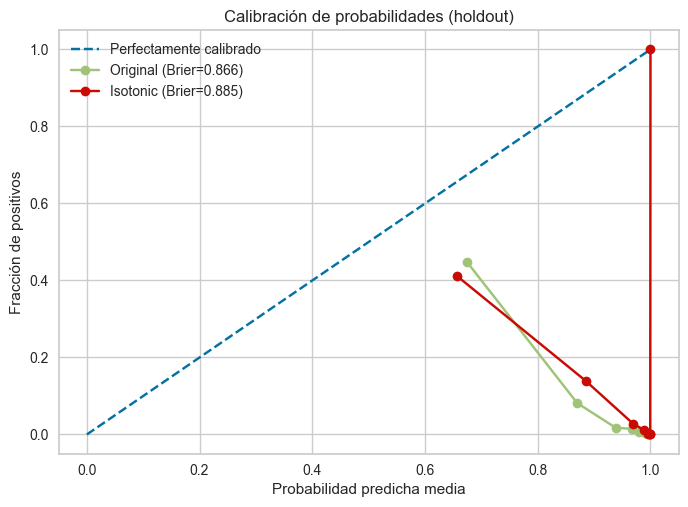

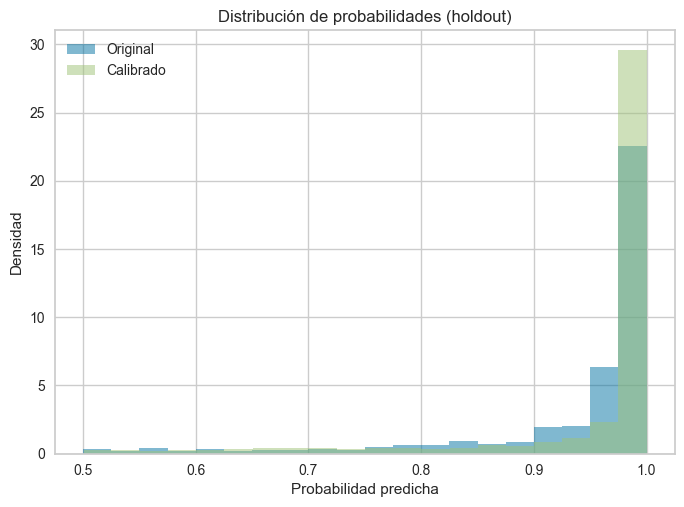

In [46]:
# Importamos las librerías necesarias
from sklearn.metrics import brier_score_loss
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt
import numpy as np

# Usamos el modelo ya entrenado
base_model = tuned

# Brier y proba en HOLDOUT (antes de calibrar)
hold_before = predict_model(base_model)
y_true = hold_before["label"].to_numpy()
p_before = hold_before["prediction_score"].to_numpy()
brier_before = brier_score_loss(y_true, p_before)

# Calibramos con método isotónico
calibrated = calibrate_model(base_model, method="isotonic")

# Brier y proba en HOLDOUT (después de calibrar)
hold_after = predict_model(calibrated)
p_after = hold_after["prediction_score"].to_numpy()
brier_after = brier_score_loss(y_true, p_after)

print(f"Brier antes  : {brier_before:.4f}")
print(f"Brier después: {brier_after:.4f}")

# Curva de confiabilidad
prob_true_b, prob_pred_b = calibration_curve(y_true, p_before, n_bins=10, strategy="quantile")
prob_true_a, prob_pred_a = calibration_curve(y_true, p_after,  n_bins=10, strategy="quantile")

plt.figure()
plt.plot([0,1], [0,1], "--", label="Perfectamente calibrado")
plt.plot(prob_pred_b, prob_true_b, "o-", label=f"Original (Brier={brier_before:.3f})")
plt.plot(prob_pred_a, prob_true_a, "o-", label=f"Isotonic (Brier={brier_after:.3f})")
plt.xlabel("Probabilidad predicha media")
plt.ylabel("Fracción de positivos")
plt.title("Calibración de probabilidades (holdout)")
plt.legend()
plt.show()

# Histograma de probabilidades
plt.figure()
plt.hist(p_before, bins=20, alpha=0.5, density=True, label="Original")
plt.hist(p_after,  bins=20, alpha=0.5, density=True, label="Calibrado")
plt.xlabel("Probabilidad predicha")
plt.ylabel("Densidad")
plt.title("Distribución de probabilidades (holdout)")
plt.legend()
plt.show()


**Respuesta:**

**Pregunta 2:**

Tras aplicar calibración isotónica al modelo ExtraTrees, observamos un comportamiento mixto. En términos de clasificación, las métricas en holdout mejoran: el AUC pasa de $0.9433$ a $0.9484$, el recall de la clase positiva sube de $0.1814$ a $0.3674$ y el $F_{1}$ aumenta de $0.2943$ a $0.4716$, con una ligera caída de la precision de $0.7800$ a $0.6583$ y una accuracy que también mejora levemente ($0.9468 \rightarrow 0.9497$). Sin embargo, desde el punto de vista probabilístico la calibración no ayudó: el Brier score empeora ($0.8658 \rightarrow 0.8854$, menor es mejor) y el diagrama de confiabilidad muestra una curva por debajo de la diagonal para probabilidades altas, evidenciando overconfidence (las probabilidades predichas son demasiado extremas respecto de la frecuencia empírica). Esto también se aprecia en el histograma, con gran masa cerca de $1.0$ que incluso aumenta tras calibrar. En síntesis, la calibración isotónica reescaló las salidas de modo que mejoró el compromiso recall/precision a umbral $0.5$, pero no mejoró (y de hecho degradó) la calidad de las probabilidades. Para obtener probabilidades mejor calibradas sugerimos calibrar con validación cruzada y probar Platt scaling (sigmoid) o aumentar la regularización del modelo; para decisiones operativas, ajustar el umbral sobre las probabilidades calibradas según la curva PR/threshold.


Mucho éxito!

<center>
<img src="https://i.pinimg.com/originals/55/3d/42/553d42bea9b10e0662a05aa8726fc7f4.gif" width=300>